# 1 Dimensional Models of Short Bursts

We model short bursts on the integer line with transition probabilities that depend on the current location of the walk.

In particular we look at geometric and normal models on the line and compare their expected behavoirs to the empirical behavoir of short bursts on states.

### Tilted Run analysis

Let $p$ be the probability of accepting a worse proposal and let $P(y,z)$ be the probability of moving from $y$ to $z$.

Suppose we are at possition $x$ on the line.  Then the probability of moving left $P(l)$, the probability of staying $P(s)$, and the probability of moving right $P(r)$ are as follows:

$$P(l) = \frac{P(x,x-1) p}{1-P(x,x-1)(1-p)}$$

$$P(s) = \frac{P(x,x)}{1-P(x,x-1)(1-p)}$$


$$P(r) = \frac{P(x,x+1)}{1-P(x,x-1)(1-p)}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from scipy import stats
from itertools import product 

### Define Simulations

We define functions to simulate the behavoir on an neutral random walk, short bursts, and tilted runs, on the integer line.  The transition probabilities of the model is given by the function `ps`, which takes a possition $x$ and returns the vector $(p_{x,-1}, p_{x,0}, p_{x,+1})$ which defines the probabilites of moving from $x$ to $x-1$, $x$ to $x$, and $x$ to $x+1$ respectively.

In [2]:
## Returns an unbiased random walk on the line, with probabilities of movement at pos i given by ps(i)
def random_walk(iters, ps):
    rw = np.zeros(iters)
    for i in range(1,iters):
        prev = rw[i-1]
        rw[i] = np.random.choice([prev-1, prev, prev+1], p=ps(prev))
    return rw

In [3]:
def short_burst(burst_len, num_bursts, ps):
    sb_run = np.zeros(burst_len*num_bursts)
    cur_max = 0
    for i in range(num_bursts):
        for j in range(burst_len):
            k = i*burst_len + j
            if j == 0:
                sb_run[k] = cur_max
            else:
                prev = sb_run[k-1]
                sb_run[k] = np.random.choice([prev-1, prev, prev+1], p=ps(prev))
                if sb_run[k] > cur_max: cur_max = sb_run[k]
    return sb_run

In [4]:
def tilted_run(iters, p, ps):
    tw = np.zeros(iters)
    for i in range(1, iters):
        prev = tw[i-1]
        while True:
            proposal = np.random.choice([prev-1, prev, prev+1], p=ps(prev))
            if proposal >= prev: break
            if random.random() < p: break
        tw[i] = proposal
    return tw

## Compare the types of run:

We compare the the three types of runs on 4 models:
* equal probability of moving left and right: $P(x) = (0.25, 0.5, 0.25)$
* constant weight towards the origin: $P(x) = (0.1, 0.5, 0.4)$ if $x < 0$, $(0.4, 0.5, 0.1)$ if $x > 0$, and $(0.25, 0.5, 0.25)$ if $x = 0$.

// TODO::
* Geometric position dependent weights
* Normal position dependent weights

#### Equal Prob Model

In [515]:
## Returns a series of short bursts on the line, with probabilities of movement at pos i given by ps(i)
ub = random_walk(10000, lambda i: [1/3, 1/3, 1/3])
sb5 = short_burst(5, 2000, lambda i: [1/3, 1/3, 1/3])
sb10 = short_burst(10, 1000, lambda i: [1/3, 1/3, 1/3])

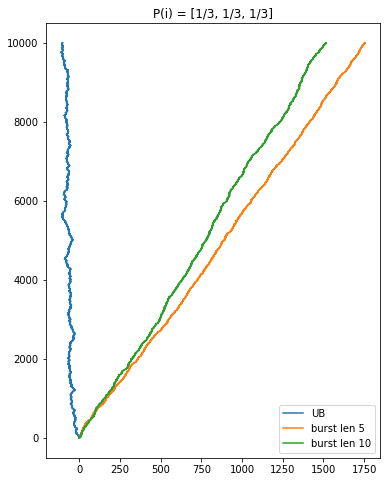

In [517]:
plt.figure(figsize=(6,8))
plt.title("P(i) = [1/3, 1/3, 1/3]")
plt.plot(ub, range(10000), label="UB")
plt.plot(sb5, range(10000), label="burst len 5")
plt.plot(sb10, range(10000), label="burst len 10")
plt.legend()
plt.show()

#### Const weight towards origin

In [5]:
const_weight = lambda i: [0.25, 0.5, 0.25] if i == 0 else ([0.1, 0.5, 0.4] if i < 1 else [0.4, 0.5, 0.1])

In [7]:
const_weight(1)

[0.4, 0.5, 0.1]

In [85]:
## Returns a series of short bursts on the line,
## with probabilities of movement at pos i given by ps(i)
ub = random_walk(100000, const_weight)
sb1 = short_burst(1, 100000, const_weight)
sb2 = short_burst(2, 50000, const_weight)
sb5 = short_burst(5, 20000, const_weight)
sb10 = short_burst(10, 10000, const_weight)
t3 = tilted_run(100000, 0.33, const_weight)
t4 = tilted_run(100000, 0.25, const_weight)
t5 = tilted_run(100000, 0.20, const_weight)
t6 = tilted_run(100000, 0.15, const_weight)
t10 = tilted_run(100000, 0.1, const_weight)

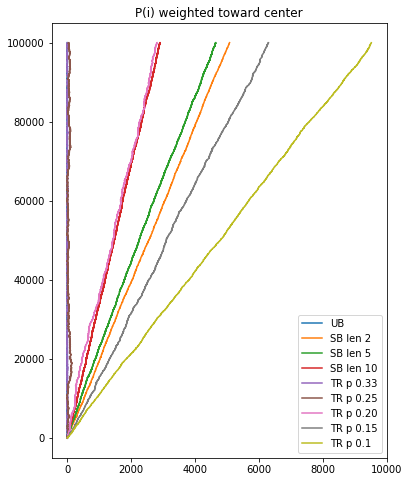

In [88]:
plt.figure(figsize=(6,8))
plt.title("P(i) weighted toward center")
plt.plot(ub, range(100000), label="UB")
# plt.plot(sb1, range(100000), label="SB len 1")
plt.plot(sb2, range(100000), label="SB len 2")
plt.plot(sb5, range(100000), label="SB len 5")
plt.plot(sb10, range(100000), label="SB len 10")
plt.plot(t3, range(100000), label="TR p 0.33")
plt.plot(t4, range(100000), label="TR p 0.25")
plt.plot(t5, range(100000), label="TR p 0.20")
plt.plot(t6, range(100000), label="TR p 0.15")
plt.plot(t10, range(100000), label="TR p 0.1")

plt.legend()
plt.show()

In [143]:
50*0.1

5.0

In [142]:
50*(1/3)

16.666666666666664

In [144]:
sb2_eq = [short_burst(2, 50, lambda i: [1/3, 1/3, 1/3]) for i in range(10000)]

In [145]:
np.mean([max(x) for x in sb2_eq])

16.6797

In [146]:
sb2 = [short_burst(2, 50, const_weight) for i in range(10000)]

In [147]:
np.mean([max(x) for x in sb2])

5.6062

#### Geometric Weight

In [18]:
geometric = lambda i: [0.5, 0.5-2**(-i-1), 2**(-i-1)] if i>=0 else [2**(i-1), 0.5-2**(i-1), 0.5]

In [532]:
n = 100000

In [533]:
ub_geom = [random_walk(n, geometric) for i in range(10)]
sb2_geom = [short_burst(2, int(n/2), geometric) for i in range(10)]
sb5_geom = [short_burst(5, int(n/5), geometric) for i in range(10)]
sb10_geom = [short_burst(10, int(n/10), geometric) for i in range(10)]

In [534]:
tilt_4_geom  = [tilted_run(n, 0.25, geometric) for i in range(10)]
tilt_8_geom  = [tilted_run(n, 0.125, geometric) for i in range(10)]
tilt_16_geom  = [tilted_run(n, 0.0625, geometric) for i in range(10)]

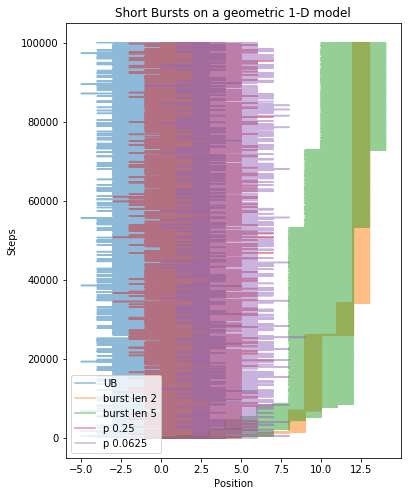

In [538]:
plt.figure(figsize=(6,8))
plt.title("Short Bursts on a geometric 1-D model")
plt.ylabel("Steps")
plt.xlabel("Position")
plt.plot(ub_geom[0], range(n), label="UB", alpha=0.5)
plt.plot(sb2_geom[0], range(n), label="burst len 2", alpha=0.5)
plt.plot(sb5_geom[0], range(n), label="burst len 5", alpha=0.5)
# plt.plot(sb10_geom[0], range(n), label="burst len 10", alpha=0.5)
plt.plot(tilt_4_geom[0], range(n), label="p 0.25", alpha=0.5)
# plt.plot(tilt_8_geom[0], range(n), label="p 0.125", alpha=0.5)
plt.plot(tilt_16_geom[0], range(n), label="p 0.0625", alpha=0.5)
plt.legend()
plt.savefig("plots/geometric_model_time_plot.png", bbox_inches="tight", dpi=300)
plt.show()

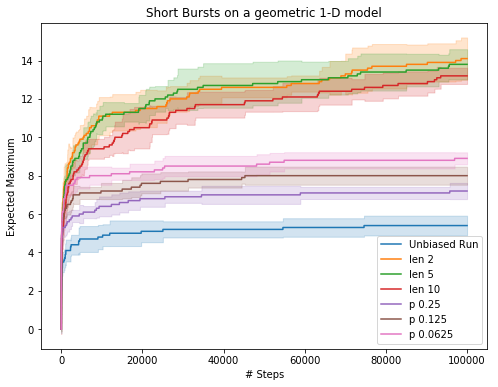

In [536]:
plt.figure(figsize=(8,6))
plt.title("Short Bursts on a geometric 1-D model")
plt.xlabel("# Steps")
plt.ylabel("Expected Maximum")
sns.lineplot(y=np.array([np.maximum.accumulate(r) for r in ub_geom]).flatten(), x=[i for i in range(n)]*10,
             ci="sd", label="Unbiased Run")
sns.lineplot(y=np.array([np.maximum.accumulate(r) for r in sb2_geom]).flatten(), x=[i for i in range(n)]*10,
             ci="sd", label="len 2")
sns.lineplot(y=np.array([np.maximum.accumulate(r) for r in sb5_geom]).flatten(), x=[i for i in range(n)]*10,
             ci="sd", label="len 5")
sns.lineplot(y=np.array([np.maximum.accumulate(r) for r in sb10_geom]).flatten(), x=[i for i in range(n)]*10,
             ci="sd", label="len 10")
sns.lineplot(y=np.array([np.maximum.accumulate(r) for r in tilt_4_geom ]).flatten(), x=[i for i in range(n)]*10,
             ci="sd", label="p 0.25")
sns.lineplot(y=np.array([np.maximum.accumulate(r) for r in tilt_8_geom ]).flatten(), x=[i for i in range(n)]*10,
             ci="sd", label="p 0.125")
sns.lineplot(y=np.array([np.maximum.accumulate(r) for r in tilt_16_geom ]).flatten(), x=[i for i in range(n)]*10,
             ci="sd", label="p 0.0625")
plt.savefig("plots/geometric_model_expected_max.png", bbox_inches="tight", dpi=300)
plt.show()

#### Normal Weights

In [19]:
pi = lambda i: stats.norm.pdf(i, loc=0, scale=1.44)
normal = lambda i: [0.5, 0.5-(pi(i+1)/(2*pi(i))), (pi(i+1)/(2*pi(i)))] if i > 0 else ([(pi(i-1)/(2*pi(i))) , 0.5 - (pi(i-1)/(2*pi(i))), 0.5] if i < 0 else [pi(-1)/(2*pi(0)),1 - 2*pi(-1)/(2*pi(0)) ,pi(-1)/(2*pi(0))])

In [16]:
stats.norm.pdf(0.5, loc=0, scale=1.44)

0.2608360362695029

In [19]:
ub_norm = [random_walk(100000, normal) for i in range(10)]
sb2_norm = [short_burst(2, 50000, normal) for i in range(10)]
sb5_norm = [short_burst(5, 20000, normal) for i in range(10)]
sb10_norm = [short_burst(10, 10000, normal) for i in range(10)]

In [20]:
tilt_4_norm  = [tilted_run(100000, 0.25, normal) for i in range(10)]
tilt_8_norm  = [tilted_run(100000, 0.125, normal) for i in range(10)]
tilt_16_norm  = [tilted_run(100000, 0.0625, normal) for i in range(10)]

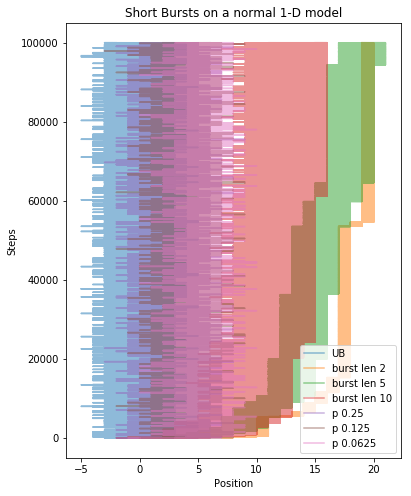

In [23]:
plt.figure(figsize=(6,8))
plt.title("Short Bursts on a normal 1-D model")
plt.ylabel("Steps")
plt.xlabel("Position")
plt.plot(ub_norm[0], range(n), label="UB", alpha=0.5)
plt.plot(sb2_norm[0], range(n), label="burst len 2", alpha=0.5)
plt.plot(sb5_norm[0], range(n), label="burst len 5", alpha=0.5)
plt.plot(sb10_norm[0], range(n), label="burst len 10", alpha=0.5)
plt.plot(tilt_4_norm[0], range(n), label="p 0.25", alpha=0.5)
plt.plot(tilt_8_norm[0], range(n), label="p 0.125", alpha=0.5)
plt.plot(tilt_16_norm[0], range(n), label="p 0.0625", alpha=0.5)
plt.legend()
plt.show()

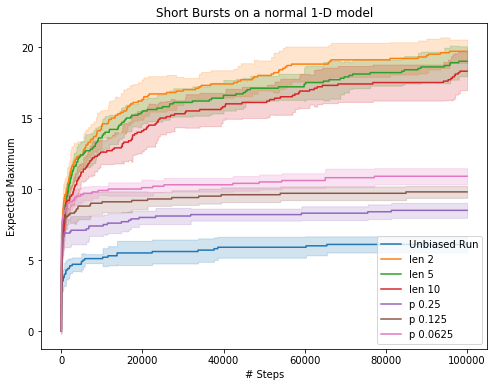

In [24]:
plt.figure(figsize=(8,6))
plt.title("Short Bursts on a normal 1-D model")
plt.xlabel("# Steps")
plt.ylabel("Expected Maximum")
sns.lineplot(y=np.array([np.maximum.accumulate(r) for r in ub_norm]).flatten(), x=[i for i in range(n)]*10,
             ci="sd", label="Unbiased Run")
sns.lineplot(y=np.array([np.maximum.accumulate(r) for r in sb2_norm]).flatten(), x=[i for i in range(n)]*10,
             ci="sd", label="len 2")
sns.lineplot(y=np.array([np.maximum.accumulate(r) for r in sb5_norm]).flatten(), x=[i for i in range(n)]*10,
             ci="sd", label="len 5")
sns.lineplot(y=np.array([np.maximum.accumulate(r) for r in sb10_norm]).flatten(), x=[i for i in range(n)]*10,
             ci="sd", label="len 10")
sns.lineplot(y=np.array([np.maximum.accumulate(r) for r in tilt_4_norm]).flatten(), x=[i for i in range(n)]*10,
             ci="sd", label="p 0.25")
sns.lineplot(y=np.array([np.maximum.accumulate(r) for r in tilt_8_norm]).flatten(), x=[i for i in range(n)]*10,
             ci="sd", label="p 0.125")
sns.lineplot(y=np.array([np.maximum.accumulate(r) for r in tilt_16_norm]).flatten(), x=[i for i in range(n)]*10,
             ci="sd", label="p 0.0625")
plt.savefig("plots/normal_model_expected_max.png", bbox_inches="tight", dpi=300)
plt.show()

### Calculate Expected Values

In [279]:
expected_distance_from_origin(2, geometric)[:,2]

array([0.   , 0.5  , 0.125, 0.   ])

#### Define prob functions

In [20]:
def geom(x, m):
    if m == 1:
        return 0.5 if x < 0 else 2**(-x-1)
    elif m == -1:
        return 2**(x-1) if x < 0 else 0.5
    else:
        return 0.5 - 2**(x-1) if x < 0 else 0.5 - 2**(-x-1)

In [21]:
pi = lambda i: stats.norm.pdf(i, loc=0, scale=1.44)
def norm(x, m):
    if m == 1:
        return 0.5 if x < 0 else pi(x+1)/(2*pi(x))
    elif m == -1:
        return pi(x-1)/(2*pi(x)) if x <= 0 else 0.5
    else:
        return 1 - norm(x, -1) - norm(x, 1)

In [22]:
eq = lambda x,m: 1/3

In [28]:
def origin_pull(x,m):
    if m == 1:
        return 0.1 if x > 0 else (0.4 if x < 0 else 0.25)
    if m == -1:
        return 0.4 if x > 0 else (0.1 if x < 0 else 0.25)
    else:
        return 0.5

#### Define Dynamic Programing Calculations

In [23]:
## For an unbiased walk, this function calculates the expected distance from the origin  
## after num_steps steps with respect tothe given transition probability function f(x)
def expected_distance_from_origin(num_steps, f):
    N = num_steps + 1
    pos_probs = np.zeros((N+1, 2*N+1))
    pos_probs[0][N] = 1
    
    for n in range(1,N):
        for x in range(-n, n+1):
            prob_n_x = pos_probs[n-1][N+x-1]*f(x-1, 1) + pos_probs[n-1][N+x]*f(x,0) + pos_probs[n-1][N+x+1]*f(x+1, -1)
            pos_probs[n][N + x] = prob_n_x
    
    return pos_probs #np.sum(np.abs(np.arange(-N, N+1))*pos_probs[N-1])

In [456]:
## For an unbiased walk, this function calculates the expected distance from the origin  
## after num_steps steps with respect tothe given transition probability function f(x)
def probility_of_position_no_returns(num_steps, f):
    N = num_steps + 1
    pos_probs = np.zeros((N+1, 2*N+1))
    pos_probs[0][N] = 1
    
    for n in range(1,N):
        for x in range(-n, n+1):
            prob_n_x = pos_probs[n-1][N+x-1]*f(x-1, 1) + pos_probs[n-1][N+x]*f(x,0) #+ pos_probs[n-1][N+x+1]*f(x+1, -1)
            pos_probs[n][N + x] = prob_n_x
    
    return pos_probs #np.sum(np.abs(np.arange(-N, N+1))*pos_probs[N-1])

In [15]:
### THIS IS JUST WRONG

## For an unbiased walk, this function calculates the expected maximum distance from the
## origin after num_steps steps with respect to the given transition probability function f(x)
def expected_max_distance_from_origin(num_steps, f):
    N = num_steps + 1
    pos_probs = np.zeros((N+1, 2*N+1))
    max_probs = np.zeros((N, N))
    pos_probs[0][N] = 1
    max_probs[0][0] = 1
    
    
    for n in range(1,N):
        for x in range(-n, n+1):
            prob_n_x = pos_probs[n-1][N+x-1]*f(x-1)[2] + pos_probs[n-1][N+x]*f(x)[1] + pos_probs[n-1][N+x+1]*f(x+1)[0]
            pos_probs[n][N + x] = prob_n_x
            
            if x >= 0:
                prob_n_x_max = max_probs[n-1][x] + pos_probs[n-1][N+x-1]*f(x-1)[2]
                max_probs[n][x] = prob_n_x_max
    
    return max_probs #np.sum(np.abs(np.arange(-N, N+1))*pos_probs[N-1])

## Expected Distance from Orgin

In [11]:
N = 1000
dist = []
for r in expected_distance_from_origin(N, geom)[:N]:
    dist.append(np.sum(r*np.abs(np.arange(-N-1, N+2))))

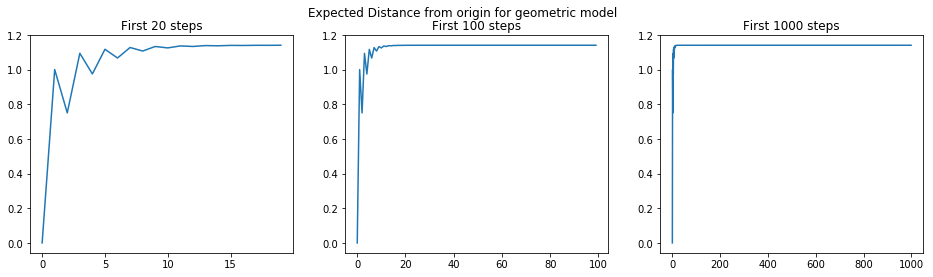

In [12]:
fig, axs = plt.subplots(1,3, figsize=(16,4))
fig.suptitle("Expected Distance from origin for geometric model")
axs[0].plot(dist[:20])
axs[1].plot(dist[:100])
axs[2].plot(dist[:1000])

axs[0].set_title("First 20 steps")
axs[1].set_title("First 100 steps")
axs[2].set_title("First 1000 steps")
plt.savefig("plots/models_on_the_line/analytic/geometric_expected_distance_from_origin.png",
            bbox_inches="tight", dpi=300)
plt.show()

In [13]:
N = 55
dist_n = []
for r in expected_distance_from_origin(N, norm)[:N]:
    dist_n.append(np.sum(r*np.abs(np.arange(-N-1, N+2))))

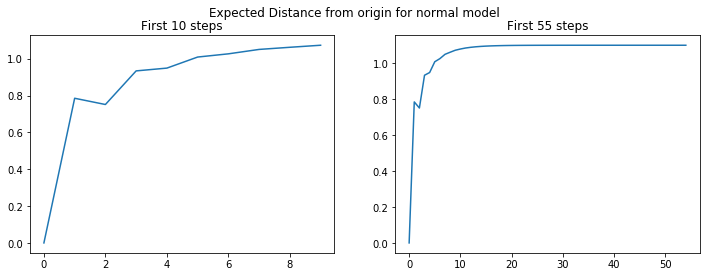

In [14]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
fig.suptitle("Expected Distance from origin for normal model")
axs[0].plot(dist_n[:10])
axs[1].plot(dist_n[:55])

axs[0].set_title("First 10 steps")
axs[1].set_title("First 55 steps")
plt.savefig("plots/models_on_the_line/analytic/normal_expected_distance_from_origin.png",
            bbox_inches="tight", dpi=300)
plt.show()

In [36]:
N = 1000
dist_c = []
for r in expected_distance_from_origin(N, origin_pull)[:N]:
    dist_c.append(np.sum(r*np.abs(np.arange(-N-1, N+2))))

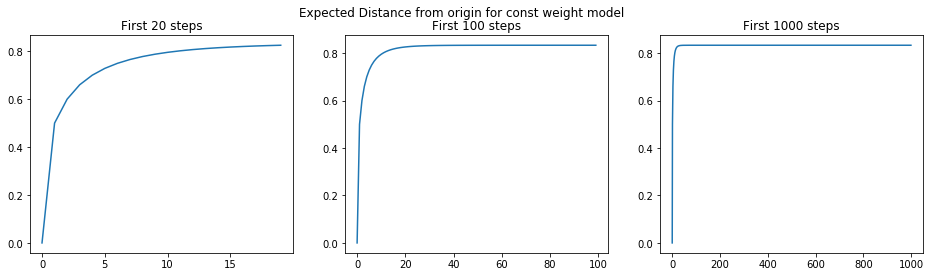

In [38]:
fig, axs = plt.subplots(1,3, figsize=(16,4))
fig.suptitle("Expected Distance from origin for const weight model")
axs[0].plot(dist_c[:20])
axs[1].plot(dist_c[:100])
axs[2].plot(dist_c[:1000])

axs[0].set_title("First 20 steps")
axs[1].set_title("First 100 steps")
axs[2].set_title("First 1000 steps")
# plt.savefig("plots/models_on_the_line/analytic/geometric_expected_distance_from_origin.png",
#             bbox_inches="tight", dpi=300)
plt.show()

### Compute Expected Max Probabilities via Enumeration

In [24]:
def string_to_walk(s, p, start):
    pos = start
    poss = [pos]
    prob = 1
    for m in s:
        if m == "l": 
            prob *= p(pos, -1)
            pos -= 1
        elif m=="r": 
            prob *= p(pos, 1)
            pos += 1
        else: prob *= p(pos, 0)
        poss.append(pos)
    return(poss, prob)

In [25]:
def max_probs(n, p):
    strings = [''.join(x) for x in product('lsr', repeat=n)]
    walks = [string_to_walk(s, p, 0) for s in strings]
    max_prbs = np.zeros(n+1)
    for w,p in walks:
        m = max(w)
        max_prbs[m] += p
    return max_prbs

In [141]:
ems_equal = np.zeros(15)
probs_equal = np.zeros((15,15))
for i in range(15):
    mp = max_probs(i, lambda x,m: 1/3)
    e_m = np.sum(np.array(mp)*np.arange(i+1))
    ems_equal[i] = e_m
    np.put(probs_equal[i], np.arange(i+1), mp)
    print("i: {}\t E(m): {}\t probs: {}".format(i, e_m, mp))

i: 0	 E(m): 0.0	 probs: [1.]
i: 1	 E(m): 0.3333333333333333	 probs: [0.66666667 0.33333333]
i: 2	 E(m): 0.5555555555555556	 probs: [0.55555556 0.33333333 0.11111111]
i: 3	 E(m): 0.7407407407407407	 probs: [0.48148148 0.33333333 0.14814815 0.03703704]
i: 4	 E(m): 0.9012345679012346	 probs: [0.43209877 0.32098765 0.17283951 0.0617284  0.01234568]
i: 5	 E(m): 1.0452674897119343	 probs: [0.39506173 0.30864198 0.18518519 0.08230453 0.02469136 0.00411523]
i: 6	 E(m): 1.17695473251029	 probs: [0.36625514 0.2962963  0.1920439  0.09739369 0.03703704 0.00960219
 0.00137174]
i: 7	 E(m): 1.2990397805212575	 probs: [0.34293553 0.28486511 0.19524463 0.10882487 0.04801097 0.01600366
 0.00365798 0.00045725]
i: 8	 E(m): 1.4133516232281564	 probs: [3.23578723e-01 2.74348422e-01 1.96311538e-01 1.17360159e-01
 5.76131687e-02 2.25575370e-02 6.70629477e-03 1.37174211e-03
 1.52415790e-04]
i: 9	 E(m): 1.5212111974801115	 probs: [3.07168623e-01 2.64746228e-01 1.96006706e-01 1.23761622e-01
 6.58436214e-02 2.895

In [142]:
ems_goem = np.zeros(15)
probs_geom = np.zeros((15,15))
for i in range(15):
    mp = max_probs(i, geom)
    e_m = np.sum(np.array(mp)*np.arange(i+1))
    ems_goem[i] = e_m
    np.put(probs_geom[i], np.arange(i+1), mp)
    print("i: {}\t E(m): {}\n\t probs: {}".format(i, e_m, mp))

i: 0	 E(m): 0.0
	 probs: [1.]
i: 1	 E(m): 0.5
	 probs: [0.5 0.5]
i: 2	 E(m): 0.625
	 probs: [0.5   0.375 0.125]
i: 3	 E(m): 0.796875
	 probs: [0.375    0.46875  0.140625 0.015625]
i: 4	 E(m): 0.9091796875
	 probs: [0.34375    0.4296875  0.20117188 0.02441406 0.00097656]
i: 5	 E(m): 1.012542724609375
	 probs: [2.89062500e-01 4.51171875e-01 2.19970703e-01 3.77807617e-02
 1.98364258e-03 3.05175781e-05]
i: 6	 E(m): 1.103879451751709
	 probs: [2.57812500e-01 4.35058594e-01 2.56072998e-01 4.76264954e-02
 3.35216522e-03 7.67707825e-05 4.76837158e-07]
i: 7	 E(m): 1.1830369047820568
	 probs: [2.24853516e-01 4.36157227e-01 2.75074005e-01 5.90751171e-02
 4.69580293e-03 1.42894685e-04 1.43423676e-06 3.72529030e-09]
i: 8	 E(m): 1.2576299201900838
	 probs: [1.99554443e-01 4.25109863e-01 3.00101757e-01 6.88439161e-02
 6.16827887e-03 2.18782225e-04 2.94609345e-06 1.30530680e-08
 1.45519152e-11]
i: 9	 E(m): 1.3237907779738123
	 probs: [1.76200867e-01 4.19105530e-01 3.17634881e-01 7.91337965e-02
 7.6154

In [143]:
ems_norm = np.zeros(15)
probs_norm = np.zeros((15,15))
for i in range(13):
    mp = max_probs(i, norm)
    e_m = np.sum(np.array(mp)*np.arange(i+1))
    ems_norm[i] = e_m
    np.put(probs_norm[i], np.arange(i+1), mp)
    print("i: {}\t E(m): {}\n\t probs: {}".format(i, e_m, mp))

i: 0	 E(m): 0.0
	 probs: [1.]
i: 1	 E(m): 0.3928710948790678
	 probs: [0.60712891 0.39287109]
i: 2	 E(m): 0.5723396418884288
	 probs: [0.5229532  0.38175395 0.09529285]
i: 3	 E(m): 0.7267689157075984
	 probs: [0.42774405 0.43201319 0.12597253 0.01427022]
i: 4	 E(m): 0.8500046105263301
	 probs: [0.37094163 0.43543113 0.16762759 0.0246803  0.00131935]
i: 5	 E(m): 0.9555011171416531
	 probs: [3.21337551e-01 4.44673501e-01 1.94156030e-01 3.68914229e-02
 2.86618431e-03 7.53098604e-05]
i: 6	 E(m): 1.0488796075571152
	 probs: [2.82221336e-01 4.44452248e-01 2.20736134e-01 4.76099504e-02
 4.77907261e-03 1.98605242e-04 2.65401057e-06]
i: 7	 E(m): 1.1321159362244688
	 probs: [2.48827113e-01 4.43209836e-01 2.42515133e-01 5.83011269e-02
 6.76988668e-03 3.68578590e-04 8.26834934e-06 5.77448955e-08]
i: 8	 E(m): 1.2079437470260077
	 probs: [2.20452917e-01 4.38959619e-01 2.62819082e-01 6.83306090e-02
 8.85216747e-03 5.68378019e-04 1.70191772e-05 2.07996186e-07
 7.75683756e-10]
i: 9	 E(m): 1.27736863420

KeyboardInterrupt: 

In [200]:
probs_norm[10]

array([1.74409805e-01, 4.26435858e-01, 2.97548987e-01, 8.74673684e-02,
       1.30658381e-02, 1.02918669e-03, 4.20962006e-05, 8.52836221e-07,
       7.91711470e-09, 2.95184352e-11, 3.29387662e-14, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

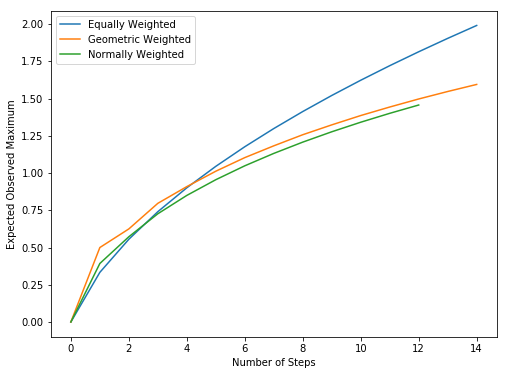

In [75]:
plt.figure(figsize=(8,6))
plt.xlabel("Number of Steps")
plt.ylabel("Expected Observed Maximum")
plt.plot(ems_equal, label="Equally Weighted")
plt.plot(ems_goem, label="Geometric Weighted")
plt.plot(ems_norm[:13], label="Normally Weighted")
# plt.plot(np.sqrt(np.arange(15))/1.5)
plt.legend()
plt.savefig("plots/expected_max_on_various_models.png", bbox_inches="tight", dpi=300)
plt.show()

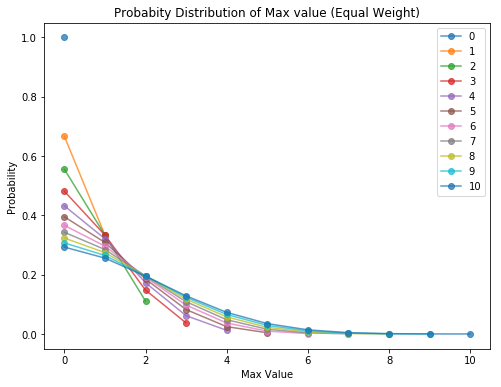

In [546]:
plt.figure(figsize=(8,6))
plt.title("Probabity Distribution of Max value (Equal Weight)")
plt.xlabel("Max Value")
plt.ylabel("Probability")

for i in range(11):
    plt.plot(probs_equal[i][:i+1], marker='o', label=i, alpha=0.75)
    
plt.legend()
plt.savefig("plots/models_on_the_line/analytic/equal_max_val_distribution.png",
            bbox_inches="tight", dpi=300)
plt.show()

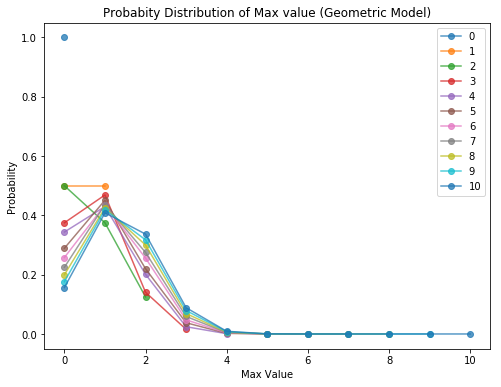

In [547]:
plt.figure(figsize=(8,6))
plt.title("Probabity Distribution of Max value (Geometric Model)")
plt.xlabel("Max Value")
plt.ylabel("Probability")
for i in range(11):
    plt.plot(probs_geom[i][:i+1], marker='o', label=i, alpha=0.75)
plt.legend()
plt.savefig("plots/models_on_the_line/analytic/geometric_max_val_distribution.png",
            bbox_inches="tight", dpi=300)
plt.show()

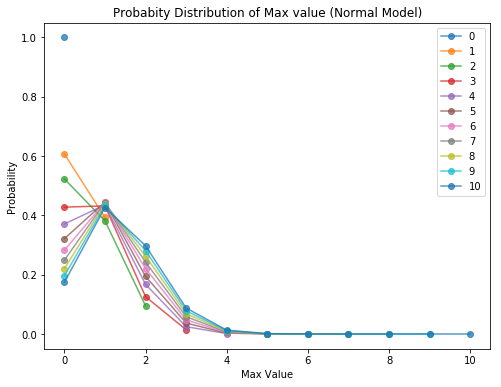

In [548]:
plt.figure(figsize=(8,6))
plt.title("Probabity Distribution of Max value (Normal Model)")
plt.xlabel("Max Value")
plt.ylabel("Probability")
for i in range(11):
    plt.plot(probs_norm[i][:i+1], marker='o', label=i, alpha=0.75)
plt.legend()
plt.savefig("plots/models_on_the_line/analytic/normal_max_val_distribution.png",
            bbox_inches="tight", dpi=300)
plt.show()

In [ ]:
## Empirical Esitmations

In [17]:
ub_equal = [random_walk(100, lambda x: [1/3,1/3,1/3]) for i in range(1000)]

In [18]:
ub_geom = [random_walk(100, geometric) for i in range(1000)]

In [19]:
ub_norm = [random_walk(100, normal) for i in range(1000)]

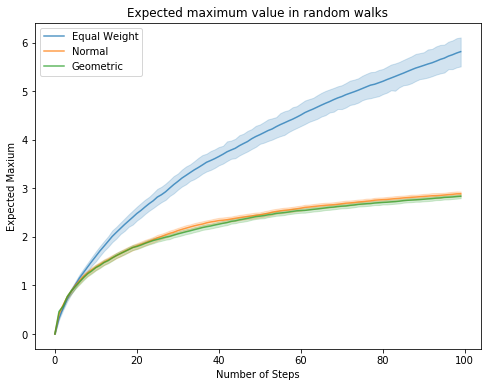

In [20]:
plt.figure(figsize=(8,6))
plt.title("Expected maximum value in random walks")
plt.xlabel("Number of Steps")
plt.ylabel("Expected Maxium")
sns.lineplot(y=np.array([np.maximum.accumulate(r) for r in ub_equal]).flatten(),
             x=[i for i in range(100)]*1000, alpha=0.75,
             label="Equal Weight")
sns.lineplot(y=np.array([np.maximum.accumulate(r) for r in ub_norm]).flatten(), 
             x=[i for i in range(100)]*1000, alpha=0.75,
             label="Normal")
sns.lineplot(y=np.array([np.maximum.accumulate(r) for r in ub_geom]).flatten(), 
             x=[i for i in range(100)]*1000, alpha=0.75,
             label="Geometric")
# plt.savefig("plots/models_on_the_line/experiments/expected_max_for_random_walk_on_models.png",
#             bbox_inches="tight", dpi=300)
plt.show()

In [30]:
np.array([np.maximum.accumulate(r[:11]) for r in ub_equal]).flatten()

array([0., 1., 2., ..., 0., 0., 0.])

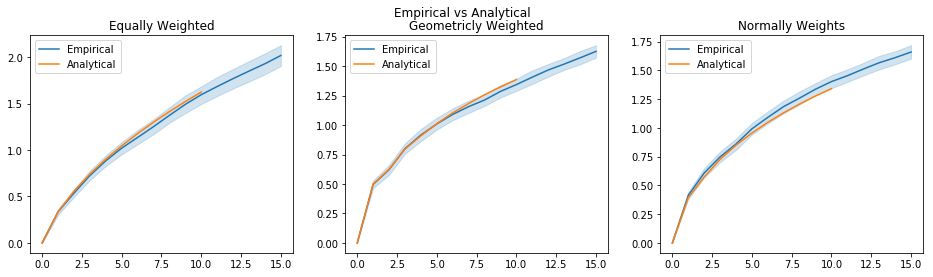

In [61]:
fig, axs = plt.subplots(1,3,figsize=(16,4))

fig.suptitle("Empirical vs Analytical")

sns.lineplot(y=np.array([np.maximum.accumulate(r[:16]) for r in ub_equal]).flatten(),
             x=[i for i in range(16)]*1000, ax=axs[0],
             label="Empirical")
axs[0].plot(ems_equal[:11], label="Analytical")
axs[0].set_title("Equally Weighted")
axs[0].legend()

sns.lineplot(y=np.array([np.maximum.accumulate(r[:16]) for r in ub_geom]).flatten(),
             x=[i for i in range(16)]*1000, ax=axs[1],
             label="Empirical")
axs[1].plot(ems_goem[:11], label="Analytical")
axs[1].set_title("Geometricly Weighted")
axs[1].legend()

sns.lineplot(y=np.array([np.maximum.accumulate(r[:16]) for r in ub_norm]).flatten(),
             x=[i for i in range(16)]*1000, ax=axs[2],
             label="Empirical")
axs[2].plot(ems_norm[:11], label="Analytical")
axs[2].set_title("Normally Weights")
axs[2].legend()

plt.show()

## Probility Distribution of Max observed in multiple short bursts

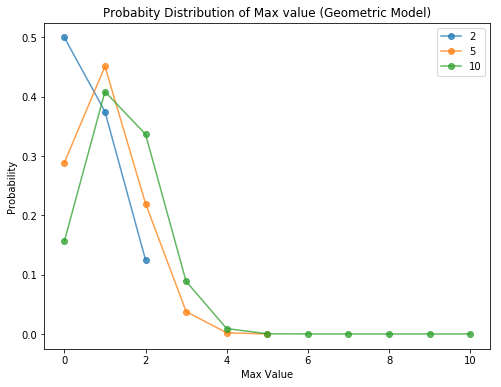

In [70]:
plt.figure(figsize=(8,6))
plt.title("Probabity Distribution of Max value (Geometric Model)")
plt.xlabel("Max Value")
plt.ylabel("Probability")
for i in [2,5,10]:
    plt.plot(probs_geom[i][:i+1], marker='o', label=i, alpha=0.75)
plt.legend()
plt.show()

In [26]:
def max_probs_from(n, p, start, tot):
    strings = [''.join(x) for x in product('lsr', repeat=n)]
    walks = [string_to_walk(s, p, start) for s in strings]
    max_prbs = np.zeros(tot+1)
    for w,p in walks:
        m = max(w)
        max_prbs[m] += p
    return max_prbs

In [27]:
def max_dist_mult_bursts(num_bursts, burst_len, p):
    iters = num_bursts*burst_len
    
    ## probabilites of maximum from first burst
    cur_max_probs = max_probs_from(burst_len, p, 0, tot=iters)
    
    for b in range(1, num_bursts):
#         print(cur_max_probs)
        start_probs = np.zeros((iters, iters+1))
        
        for i in range(burst_len*b+1):
#             print(i)
            start_probs[i] = cur_max_probs[i]*max_probs_from(burst_len,geom,i,tot=iters)
            
        cur_max_probs = np.array([np.sum(start_probs[:,i]) for i in range(iters+1)])
        
    return cur_max_probs
    

In [171]:
np.array([np.sum(start_probs[:,i]) for i in range(11)])

array([8.35571289e-02, 3.69661331e-01, 4.01882254e-01, 1.29547930e-01,
       1.46952377e-02, 6.44967372e-04, 1.10771118e-05, 7.38190942e-08,
       1.79407322e-10, 1.42136303e-13, 2.77555756e-17])

In [103]:
starts = max_probs(5,geom)

In [145]:
 max_probs(5,geom)

array([2.89062500e-01, 4.51171875e-01, 2.19970703e-01, 3.77807617e-02,
       1.98364258e-03, 3.05175781e-05])

In [147]:
 max_probs_from(5,geom,0,tot=10)

array([2.89062500e-01, 4.51171875e-01, 2.19970703e-01, 3.77807617e-02,
       1.98364258e-03, 3.05175781e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [115]:
start_probs = np.zeros((6,11))

for i in range(6):
    start_probs[i] = starts[i]*max_probs_from(5,geom,i,tot=10)
    print("Start: {}, Probs: {}".format(i, starts[i]*max_probs_from(5,geom,i,tot=10)))

Start: 0, Probs: [8.35571289e-02 1.30416870e-01 6.35852814e-02 1.09210014e-02
 5.73396683e-04 8.82148743e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Start: 1, Probs: [0.00000000e+00 2.39244461e-01 1.72466397e-01 3.65868062e-02
 2.80450657e-03 6.92736357e-05 4.30271029e-07 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Start: 2, Probs: [0.00000000e+00 0.00000000e+00 1.65830575e-01 4.89035896e-02
 5.04338328e-03 1.90834617e-04 2.31414015e-06 6.55563781e-09
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Start: 3, Probs: [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.31365329e-02
 4.41157732e-03 2.28281915e-04 4.34358037e-06 2.59321382e-08
 3.51860763e-11 0.00000000e+00 0.00000000e+00]
Start: 4, Probs: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.86237384e-03 1.18167032e-04 3.07224699e-06 2.93695646e-08
 8.68860539e-11 5.77315973e-14 0.00000000e+00]
Start: 5, Probs: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000

In [212]:
int(10/2)

5

### Effects of multiple short bursts

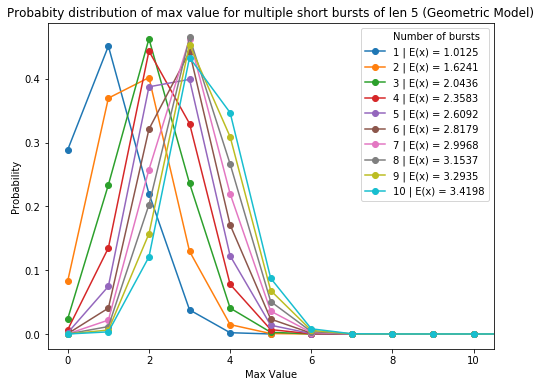

In [54]:
plt.figure(figsize=(8,6))
plt.title("Probabity distribution of max value for multiple short bursts of len 5 (Geometric Model)")
plt.xlabel("Max Value")
plt.ylabel("Probability")
plt.plot([], label="Number of bursts", linewidth=0, c="k")
plt.xlim(-0.5,10.5)
for i in range(1,11):
    x = max_dist_mult_bursts(i,5,geom)
    plt.plot(x, marker="o", label="{} | E(x) = {:2.4f}".format(i, np.sum(x*np.arange(i*5 +1))))
plt.legend()
plt.show()

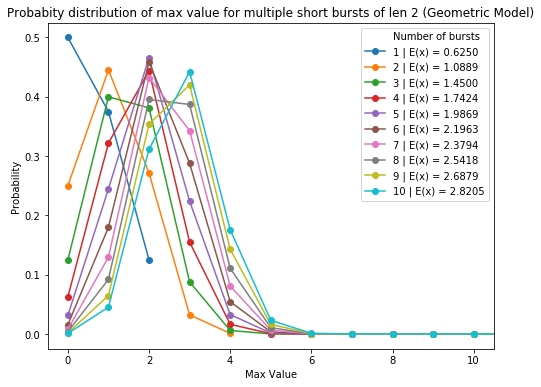

In [60]:
plt.figure(figsize=(8,6))
plt.title("Probabity distribution of max value for multiple short bursts of len 2 (Geometric Model)")
plt.xlabel("Max Value")
plt.ylabel("Probability")
plt.plot([], label="Number of bursts", linewidth=0, c="k")
plt.xlim(-0.5,10.5)
for i in range(1,11):
    x = max_dist_mult_bursts(i,2,geom)
    plt.plot(x, marker="o", label="{} | E(x) = {:2.4f}".format(i, np.sum(x*np.arange(i*2 +1))))
plt.legend()
plt.show()

#### Geometric Model

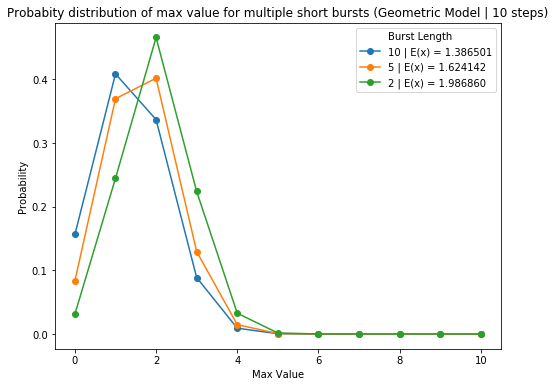

In [244]:
plt.figure(figsize=(8,6))
plt.title("Probabity distribution of max value for multiple short bursts (Geometric Model | 10 steps)")
plt.xlabel("Max Value")
plt.ylabel("Probability")
plt.plot([], label="Burst Length", linewidth=0, c="k")
for k in [10,5,2]:
    x = max_dist_mult_bursts(int(10/k),k,geom)
    plt.plot(x, marker='o', label="{} | E(x) = {:f}".format(k, np.sum(x*np.arange(11))))
plt.legend()
plt.show()

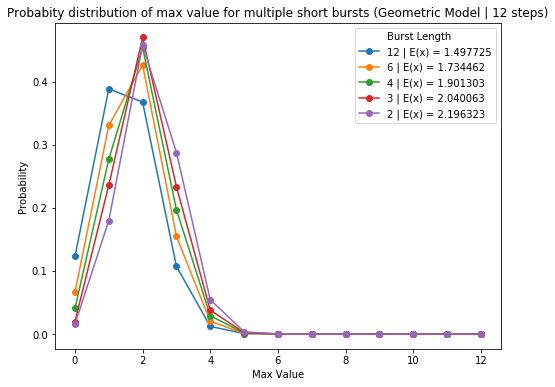

In [245]:
plt.figure(figsize=(8,6))
plt.title("Probabity distribution of max value for multiple short bursts (Geometric Model | 12 steps)")
plt.xlabel("Max Value")
plt.ylabel("Probability")
plt.plot([], label="Burst Length", linewidth=0, c="k")
for k in [12,6,4,3,2]:
    x = max_dist_mult_bursts(int(12/k),k,geom)
    plt.plot(x, marker='o', label="{} | E(x) = {:f}".format(k, np.sum(x*np.arange(13))))
plt.legend()
plt.show()

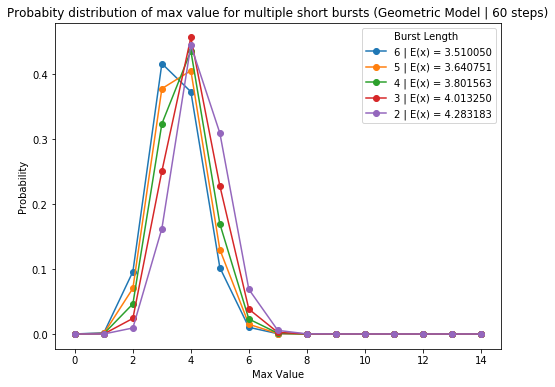

In [252]:
plt.figure(figsize=(8,6))
plt.title("Probabity distribution of max value for multiple short bursts (Geometric Model | 60 steps)")
plt.xlabel("Max Value")
plt.ylabel("Probability")
plt.plot([], label="Burst Length", linewidth=0, c="k")
for k in [6,5,4,3,2]:
    x = max_dist_mult_bursts(int(60/k),k,geom)
    plt.plot(x[:15], marker='o', label="{} | E(x) = {:f}".format(k, np.sum(x*np.arange(61))))
plt.legend()
plt.show()

#### Normal Model

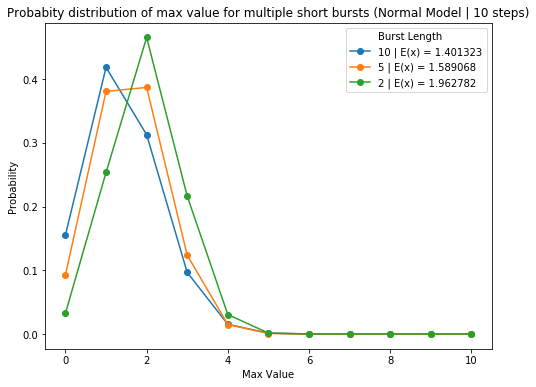

In [267]:
plt.figure(figsize=(8,6))
plt.title("Probabity distribution of max value for multiple short bursts (Normal Model | 10 steps)")
plt.xlabel("Max Value")
plt.ylabel("Probability")
plt.plot([], label="Burst Length", linewidth=0, c="k")
# plt.plot(max_dist_mult_bursts(1,10,norm), marker='o', label=10)
plt.plot(probs_norm[11][:11], marker="o", 
         label="{} | E(x) = {:f}".format(10, np.sum(probs_norm[11][:11]*np.arange(11))))
for k in [5,2]:
    x = max_dist_mult_bursts(int(10/k),k,norm)
    plt.plot(x, marker='o', label="{} | E(x) = {:f}".format(k, np.sum(x*np.arange(11))))
plt.legend()
plt.show()

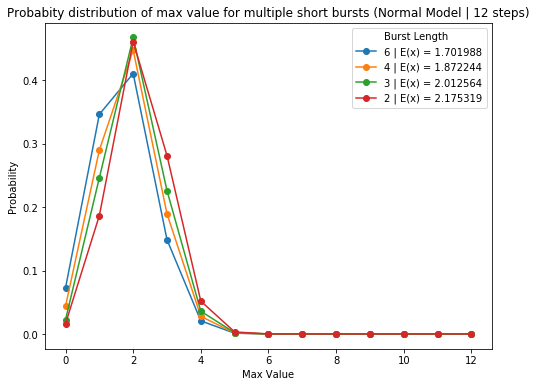

In [254]:
plt.figure(figsize=(8,6))
plt.title("Probabity distribution of max value for multiple short bursts (Normal Model | 12 steps)")
plt.xlabel("Max Value")
plt.ylabel("Probability")
plt.plot([], label="Burst Length", linewidth=0, c="k")
# plt.plot(max_dist_mult_bursts(1,12,norm), marker='o', label=12)
for k in [6,4,3,2]:
    x = max_dist_mult_bursts(int(12/k),k,norm)
    plt.plot(x, marker='o', label="{} | E(x) = {:f}".format(k, np.sum(x*np.arange(13))))
plt.legend()
plt.show()

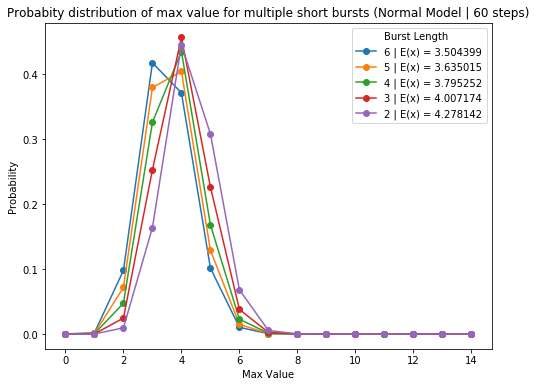

In [255]:
plt.figure(figsize=(8,6))
plt.title("Probabity distribution of max value for multiple short bursts (Normal Model | 60 steps)")
plt.xlabel("Max Value")
plt.ylabel("Probability")
plt.plot([], label="Burst Length", linewidth=0, c="k")
for k in [6,5,4,3,2]:
    x = max_dist_mult_bursts(int(60/k),k,norm)
    plt.plot(x[:15], marker='o', label="{} | E(x) = {:f}".format(k, np.sum(x*np.arange(61))))
plt.legend()
plt.show()

### Equal Weights Model

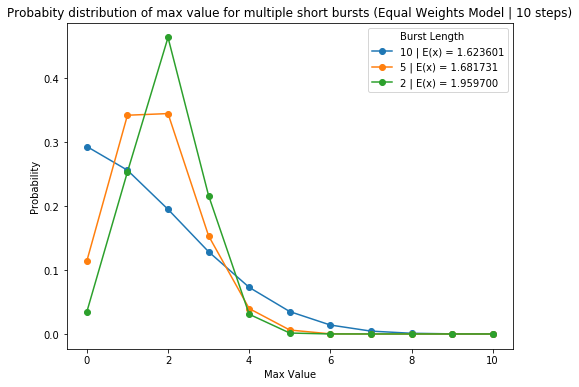

In [263]:
plt.figure(figsize=(8,6))
plt.title("Probabity distribution of max value for multiple short bursts (Equal Weights Model | 10 steps)")
plt.xlabel("Max Value")
plt.ylabel("Probability")
plt.plot([], label="Burst Length", linewidth=0, c="k")
for k in [10,5,2]:
    x = max_dist_mult_bursts(int(10/k),k,eq)
    plt.plot(x, marker='o', label="{} | E(x) = {:f}".format(k, np.sum(x*np.arange(11))))
plt.legend()
plt.show()

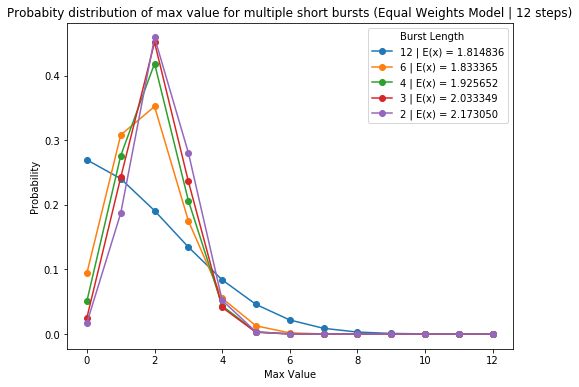

In [264]:
plt.figure(figsize=(8,6))
plt.title("Probabity distribution of max value for multiple short bursts (Equal Weights Model | 12 steps)")
plt.xlabel("Max Value")
plt.ylabel("Probability")
plt.plot([], label="Burst Length", linewidth=0, c="k")
for k in [12,6,4,3,2]:
    x = max_dist_mult_bursts(int(12/k),k,eq)
    plt.plot(x, marker='o', label="{} | E(x) = {:f}".format(k, np.sum(x*np.arange(13))))
plt.legend()
plt.show()

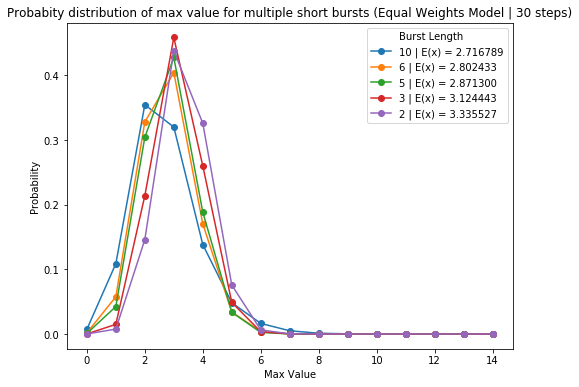

In [266]:
plt.figure(figsize=(8,6))
plt.title("Probabity distribution of max value for multiple short bursts (Equal Weights Model | 30 steps)")
plt.xlabel("Max Value")
plt.ylabel("Probability")
plt.plot([], label="Burst Length", linewidth=0, c="k")
for k in [10,6,5,3,2]:
    x = max_dist_mult_bursts(int(30/k),k,eq)
    plt.plot(x[:15], marker='o', label="{} | E(x) = {:f}".format(k, np.sum(x*np.arange(31))))
plt.legend()
plt.show()

In [297]:
dists = [(max_dist_mult_bursts(n,k,geom), k) for n, k in [(60,2), (40,3), (30,4), 
                                                          (24,5), (20,6), (15,8)]]

In [298]:
expected_max ={k:np.sum(d*np.arange(121)) for d,k in dists}

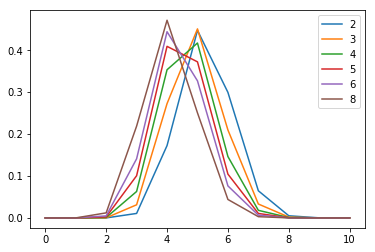

In [304]:
# [max_dist_mult_bursts(n,k,geom) for n, k in [(60,2), (40,3), (30,4), (24,5), (20,6)]]
for d,k in dists:
    plt.plot(d[:11], label=k)
    
plt.legend()
plt.show()

In [300]:
expected_max

{2: 5.250914891993361,
 3: 4.946333785781874,
 4: 4.70288245592901,
 5: 4.509237381000805,
 6: 4.349702256405257,
 8: 4.10470516277227}

In [317]:
sb_1000_2 = max_dist_mult_bursts(500,2,geom)

In [318]:
sb_1000_4 = max_dist_mult_bursts(250,4,geom)

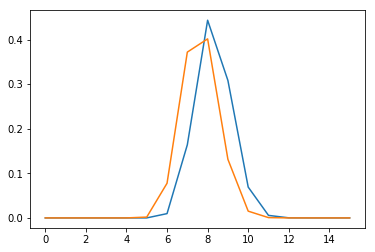

In [319]:
plt.plot(sb_1000_2[:16])
plt.plot(sb_1000_4[:16])

In [321]:
np.sum(sb_1000_2*np.arange(1001))

8.280798207603892

In [320]:
np.sum(sb_1000_4*np.arange(1001))

7.630886879508962

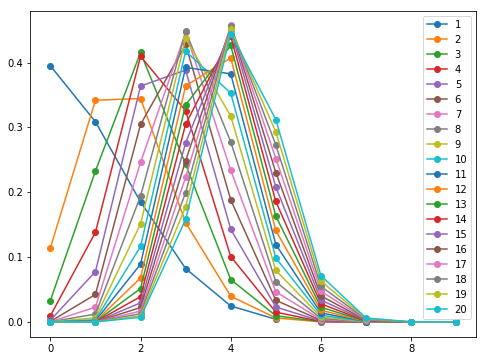

In [72]:
plt.figure(figsize=(8,6))
ems = []
for i in range(1,21):
    x = max_dist_mult_bursts(i,5,eq)
    plt.plot(x[:10], marker="o", label=i)
    ems.append(np.sum(x*np.arange(i*5+1)))
plt.legend()
plt.show()

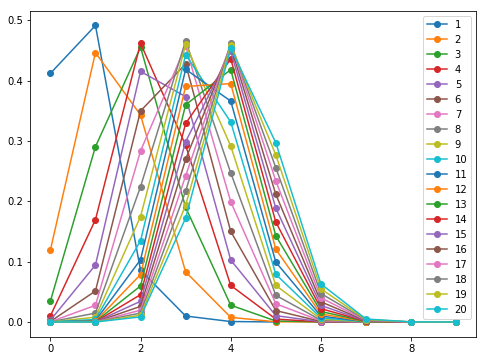

In [78]:
plt.figure(figsize=(8,6))
ems_c = []
for i in range(1,21):
    x = max_dist_mult_bursts(i,5,origin_pull)
    plt.plot(x[:10], marker="o", label=i)
    ems_c.append(np.sum(x*np.arange(i*5+1)))
plt.legend()
plt.show()

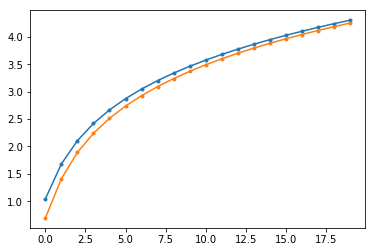

In [76]:
plt.plot(ems, marker=".")
plt.plot(ems_c, marker=".")

In [82]:
np.array(ems) - np.array(ems_c)

array([0.34976749, 0.26728597, 0.21488039, 0.17950094, 0.15431947,
       0.13556512, 0.12105818, 0.1094844 , 0.10001805, 0.09211896,
       0.08541974, 0.07966151, 0.07465602, 0.07026263, 0.06637396,
       0.06290644, 0.05979404, 0.0569839 , 0.05443319, 0.05210688])

### Trying find recurence from prob of y being maximal at step i

In [481]:
ps = lambda x,m: 1/3

In [482]:
N = 2

In [483]:
pos_probs = probility_of_position_no_returns(N, ps)

In [484]:
p_pos = pos_probs[:-1,1:-1]

In [485]:
p_pos[:, N:]

array([[1.        , 0.        , 0.        ],
       [0.33333333, 0.33333333, 0.        ],
       [0.11111111, 0.22222222, 0.11111111]])

In [487]:
not_p_pos = 1 - p_pos

In [488]:
not_p_pos[:, N:]

array([[0.        , 1.        , 1.        ],
       [0.66666667, 0.66666667, 1.        ],
       [0.88888889, 0.77777778, 0.88888889]])

In [489]:
p_obs = np.zeros(N+1)
for i in range(N+1):
    not_at_i = not_p_pos[:,N+i]
    p_i_not_obs = np.product(not_at_i)
    p_obs[i] = 1 - p_i_not_obs

In [490]:
p_obs

array([1.        , 0.48148148, 0.11111111])

In [491]:
l = list(range(N))
l.reverse()

In [492]:
p_max = np.zeros(N+1)
p_max[N] = p_obs[N]
for i in l:
    p_max[i] = p_obs[i] - p_obs[i+1]

In [493]:
p_max

array([0.51851852, 0.37037037, 0.11111111])

In [494]:
max_probs(N, ps)

array([0.55555556, 0.33333333, 0.11111111])

In [397]:
#1. # 0.59670782 - 0.20987654 - 0.03703704

0.40329218

In [147]:
N = 4
ps = lambda x, m: 1/3

In [148]:
pos_probs = expected_distance_from_origin(N, ps)

In [149]:
p_pos = pos_probs[:-1,1:-1]

In [150]:
## Check max for geom 4
p_obs = np.zeros((N+1, N+2))
p_obs[:,0] = 1
p_max = np.zeros((N+1, N+1))
p_max[0,0] = 1

In [151]:
for n in range(1, N+1):
    for y in range(1, n+1):
        p_obs[n, y] = p_obs[n-1, y] + p_pos[n-1, N+(y-1)]*p_max[n-1, y-1]*ps(y-1, 1)
    
    for y in range(n+1):
        p_max[n, y] = p_obs[n, y] - p_obs[n, y+1]

In [163]:
p_max

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [6.66666667e-01, 3.33333333e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [5.92592593e-01, 3.70370370e-01, 3.70370370e-02, 0.00000000e+00,
        0.00000000e+00],
       [5.26748971e-01, 4.08779150e-01, 6.31001372e-02, 1.37174211e-03,
        0.00000000e+00],
       [4.81227455e-01, 4.24020729e-01, 9.10430321e-02, 3.69184914e-03,
        1.69350878e-05]])

In [165]:
p_max[4]

array([4.81227455e-01, 4.24020729e-01, 9.10430321e-02, 3.69184914e-03,
       1.69350878e-05])

In [164]:
max_probs(4, ps)

array([0.43209877, 0.32098765, 0.17283951, 0.0617284 , 0.01234568])

In [103]:
p_pos

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.00000000e-01,
        0.00000000e+00, 5.00000000e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.25000000e-01, 1.25000000e-01,
        5.00000000e-01, 1.25000000e-01, 1.25000000e-01, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 1.56250000e-02, 7.81250000e-02, 3.43750000e-01,
        1.25000000e-01, 3.43750000e-01, 7.81250000e-02, 1.56250000e-02,
        0.00000000e+00],
       [9.76562500e-04, 1.66015625e-02, 1.23046875e-01, 1.87500000e-01,
        3.43750000e-01, 1.87500000e-01, 1.23046875e-01, 1.66015625e-02,
        9.76562500e-04]])

In [16]:
expected_max_distance_from_origin(3, lambda x: [1/3]*3)

array([[1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.33333333, 0.        , 0.        ],
       [1.11111111, 0.44444444, 0.11111111, 0.        ],
       [1.18518519, 0.55555556, 0.18518519, 0.03703704]])

In [280]:
expected_distance_from_origin(3, geom)[:-1,1:-1]

array([[0.      , 0.      , 0.      , 1.      , 0.      , 0.      ,
        0.      ],
       [0.      , 0.      , 0.5     , 0.      , 0.5     , 0.      ,
        0.      ],
       [0.      , 0.125   , 0.125   , 0.5     , 0.125   , 0.125   ,
        0.      ],
       [0.015625, 0.078125, 0.34375 , 0.125   , 0.34375 , 0.078125,
        0.015625]])

In [283]:
expected_distance_from_origin(3, lambda x, m: 1/3)[:-1,1:-1]

array([[0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.33333333, 0.33333333, 0.33333333,
        0.        , 0.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.22222222,
        0.11111111, 0.        ],
       [0.03703704, 0.11111111, 0.22222222, 0.25925926, 0.22222222,
        0.11111111, 0.03703704]])

In [150]:
np.sum(np.abs(np.arange(-N, N+1))*pos_probs[N-1])

1.11688232421875

In [126]:
N = 2
pos_probs = np.zeros((N+1, 2*N+1))
pos_probs[0][N] = 1

In [151]:
for n in range(1,N):
    for x in range(-n, n+1):
        prob_n_x = pos_probs[n-1][N+x-1]*geometric(x-1)[2] + pos_probs[n-1][N+x]*geometric(x)[1] + pos_probs[n-1][N+x+1]*geometric(x+1)[0]
#         print("n: {} \t x:{} \t P_n(x): {}".format(n, x, prob_n_x))
        pos_probs[n][N + x] = prob_n_x

In [ ]:
pos_probs[N-1]

In [100]:
N

5

In [170]:
np.mean(np.abs(np.array(ub_geom).flatten()))

1.14228

In [37]:
perm = combinations_with_replacement(["l", "s", "r"], 4) 

In [184]:
geom(3,1)

0.0625

In [185]:
geom(4,1)

0.03125

In [172]:
n = 2

In [173]:
strings = [''.join(x) for x in product('lsr', repeat=n)]

In [174]:
walks = [string_to_walk(s, geom) for s in strings]

In [176]:
[max(w) for w, p in walks]

[0, 0, 0, 0, 0, 1, 1, 1, 2]

In [177]:
[max(w)*p for w, p in walks]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.25, 0.125, 0.25]

In [141]:
max_probs = np.zeros(n+1)
for w,p in even_walks:
    m = max(w)
    max_probs[m] += p

In [175]:
walks

[([0, -1, -2], 0.125),
 ([0, -1, -1], 0.125),
 ([0, -1, 0], 0.25),
 ([0, 0, -1], 0.0),
 ([0, 0, 0], 0.0),
 ([0, 0, 1], 0.0),
 ([0, 1, 0], 0.25),
 ([0, 1, 1], 0.125),
 ([0, 1, 2], 0.125)]

In [302]:
ems_goem

array([0.        , 0.5       , 0.625     , 0.796875  , 0.90917969,
       1.01254272, 1.10387945, 1.1830369 , 1.25762992, 1.32379078,
       1.38650085, 1.44365008, 1.49772535, 1.54791371, 1.59539834])

In [303]:
ems_equal

array([0.        , 0.33333333, 0.55555556, 0.74074074, 0.90123457,
       1.04526749, 1.17695473, 1.29903978, 1.41335162, 1.5212112 ,
       1.62360074, 1.72127668, 1.81483551, 1.90475769, 1.99143691])

In [305]:
np.sqrt(np.arange(12))

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ,
       3.16227766, 3.31662479])